In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    data_path,
    index_col='PassengerId'
)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [4]:
dataset_arr = df.to_numpy().astype(np.float64)
X,y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [5]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, 
    y, 
    test_size=val_size, 
    random_state=random_state, 
    shuffle=is_shuffle
    )

X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train, 
    test_size=test_size, 
    random_state=random_state, 
    shuffle=is_shuffle
    )

In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

In [9]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

In [10]:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

In [11]:
def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

In [12]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [13]:
learning_rate = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [14]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, learning_rate)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEpoch {epoch+1}: \tTraining loss : {train_batch_loss:.3f} \tValidation loss : {val_batch_loss:.3f}')


Epoch 1: 	Training loss : 0.703 	Validation loss : 0.599

Epoch 2: 	Training loss : 0.670 	Validation loss : 0.582

Epoch 3: 	Training loss : 0.640 	Validation loss : 0.567

Epoch 4: 	Training loss : 0.614 	Validation loss : 0.555

Epoch 5: 	Training loss : 0.592 	Validation loss : 0.544

Epoch 6: 	Training loss : 0.572 	Validation loss : 0.535

Epoch 7: 	Training loss : 0.554 	Validation loss : 0.528

Epoch 8: 	Training loss : 0.539 	Validation loss : 0.522

Epoch 9: 	Training loss : 0.526 	Validation loss : 0.517

Epoch 10: 	Training loss : 0.514 	Validation loss : 0.513

Epoch 11: 	Training loss : 0.504 	Validation loss : 0.509

Epoch 12: 	Training loss : 0.495 	Validation loss : 0.507

Epoch 13: 	Training loss : 0.487 	Validation loss : 0.505

Epoch 14: 	Training loss : 0.480 	Validation loss : 0.503

Epoch 15: 	Training loss : 0.474 	Validation loss : 0.502

Epoch 16: 	Training loss : 0.468 	Validation loss : 0.501

Epoch 17: 	Training loss : 0.463 	Validation loss : 0.500

Epoch

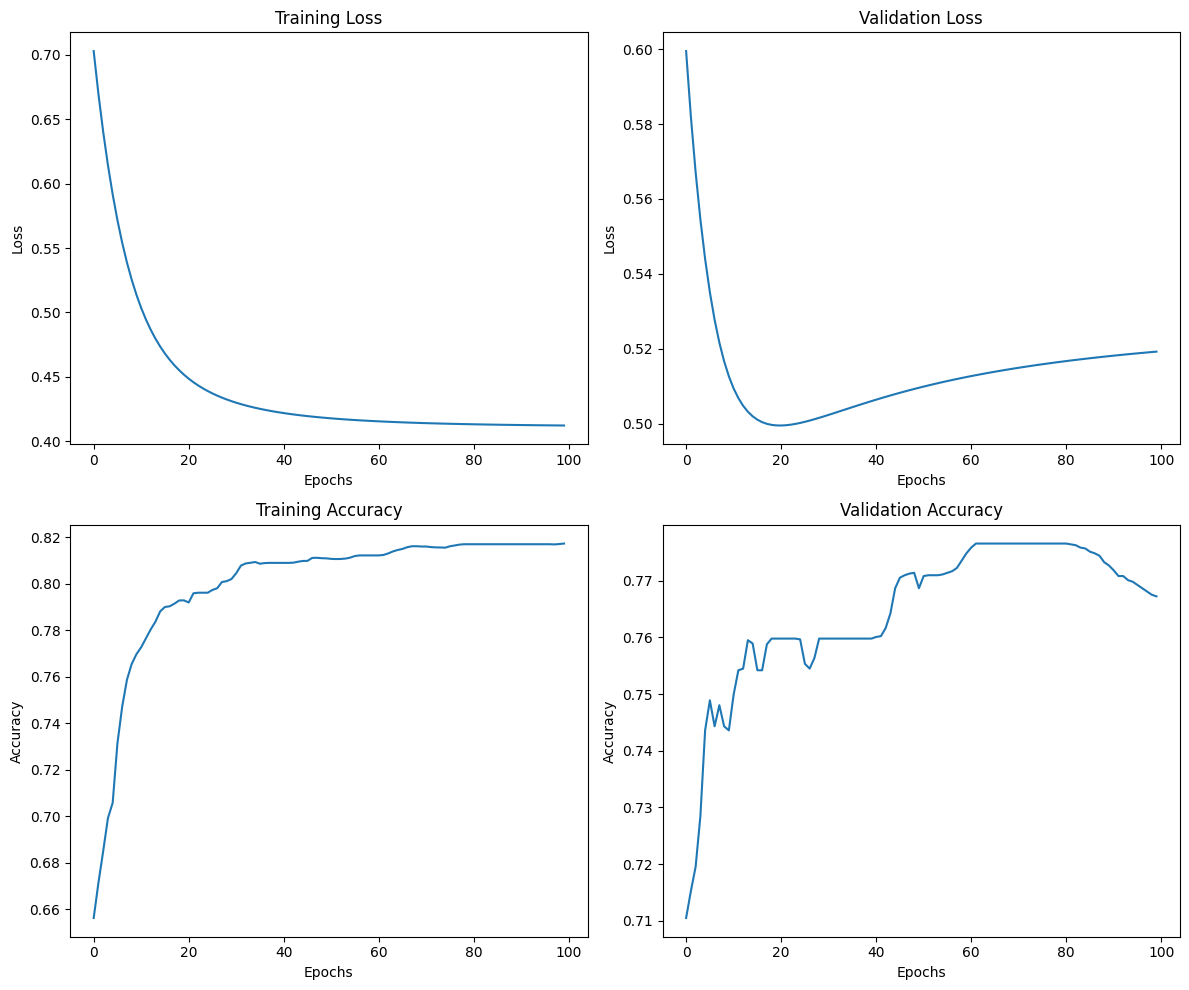

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epochs', ylabel='Loss', title='Training Loss')

ax[0, 1].plot(val_losses)
ax[0, 1].set(xlabel='Epochs', ylabel='Loss', title='Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy', title='Training Accuracy')

ax[1, 1].plot(val_accs)
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy', title='Validation Accuracy')

plt.tight_layout()
plt.show()

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Accuracy :{val_set_acc}')
print(f'Accuracy :{test_set_acc}')

Accuracy :0.770949720670391
Accuracy :0.7752808988764045
